In [1]:
import wntr # doctest: +SKIP
import folium
import pandas as pd
from pyproj import Proj

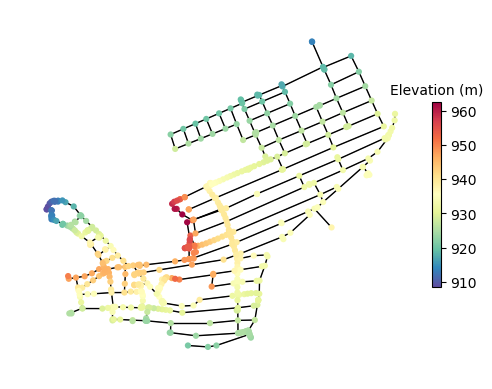

In [4]:
wn = wntr.network.WaterNetworkModel('C:\\Users\\kaiorodrigues\\Desktop\\WNTR\\1_Data\\Vale_do_Amanhecer_Final_temp.inp') # doctest: +SKIP
ax = wntr.graphics.plot_network(wn, node_attribute='elevation',   node_colorbar_label='Elevation (m)')

In [5]:
pop = wntr.metrics.population(wn)
wntr.graphics.plot_interactive_network(wn, node_attribute=pop, node_range=[0,60], filename='population.html', auto_open=False)

In [11]:
pop

J10          0.0
J100         5.0
J1000       17.0
J1002       28.0
J1004       10.0
            ... 
J994         0.0
J996        12.0
J998        38.0
V8002_NU     0.0
V8002_ND     0.0
Length: 521, dtype: float64

In [9]:
print(type(pop))

<class 'pandas.core.series.Series'>


### transformar a coordenada plana em coordenada geografica

In [6]:
df= [['J10',215665.95, 8264835.29],['RAP.VAM.001.FIT.001.000.000', 215461.47, 8264757.59]]
df = pd.DataFrame (df, columns = ['Nó','coordenada_x','coordenada_y'])
myproj = Proj('+proj=utm + zone=23 + south + ellps = WGS84', preserve_units = False)
df['Long'],df['lat'] = myproj(df['coordenada_x'].values,df['coordenada_y'].values,inverse=True)
df

,Nó,coordenada_x,coordenada_y,Long,lat
0,J10,215665.95,8264835.29,-47.652522,-15.678607
1,RAP.VAM.001.FIT.001.000.000,215461.47,8264757.59,-47.654437,-15.679285


In [10]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [7]:
longlat_map = {'J10':(-47.652522,-15.678607),'RAP.VAM.001.FIT.001.000.000':(-47.654437,-15.679285)}
wn2 = wntr.morph.convert_node_coordinates_to_longlat(wn, longlat_map)
length = wn2.query_link_attribute('length')
wntr.graphics.plot_leaflet_network(wn2, node_attribute=pop, node_size=4,link_width=1,node_range=[0,10], filename='length.html')